<a href="https://colab.research.google.com/github/raja-azlina/DGA_Detection/blob/master/threshold_GMM_creditcardfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


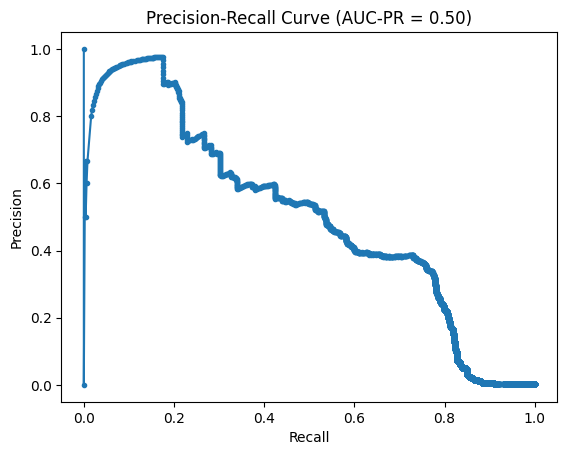

Threshold: -55.705709996295624


In [2]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("creditcard.csv")

# Separate normal and fraudulent transactions
normal_data = data[data['Class'] == 0]
fraudulent_data = data[data['Class'] == 1]

# Use only features (V1 - V28)
features = ['V' + str(i) for i in range(1, 29)]

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=2)
gmm.fit(normal_data[features])

# Calculate negative log-likelihood as anomaly score for both normal and fraudulent data
normal_score = -gmm.score_samples(normal_data[features])
fraudulent_score = -gmm.score_samples(fraudulent_data[features])

# Combine scores and labels
scores = np.concatenate([normal_score, fraudulent_score])
labels = np.concatenate([np.zeros(len(normal_score)), np.ones(len(fraudulent_score))])

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(labels, scores)

# Calculate AUC-PR (Area Under the Precision-Recall Curve)
auc_pr = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC-PR = {auc_pr:.2f})')
plt.show()

# Determine threshold based on precision-recall curve
desired_recall = 0.9  # Example: target 90% recall
threshold_index = np.argmax(recall >= desired_recall)
threshold = thresholds[threshold_index]

print("Threshold:", threshold)
